In [1]:
import tensorflow as tf

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [4]:
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print(f"Normalized x_train shape: {x_train.shape}")
print(f"One-hot encoded y_train shape: {y_train.shape}")

Normalized x_train shape: (50000, 32, 32, 3)
One-hot encoded y_train shape: (50000, 10)


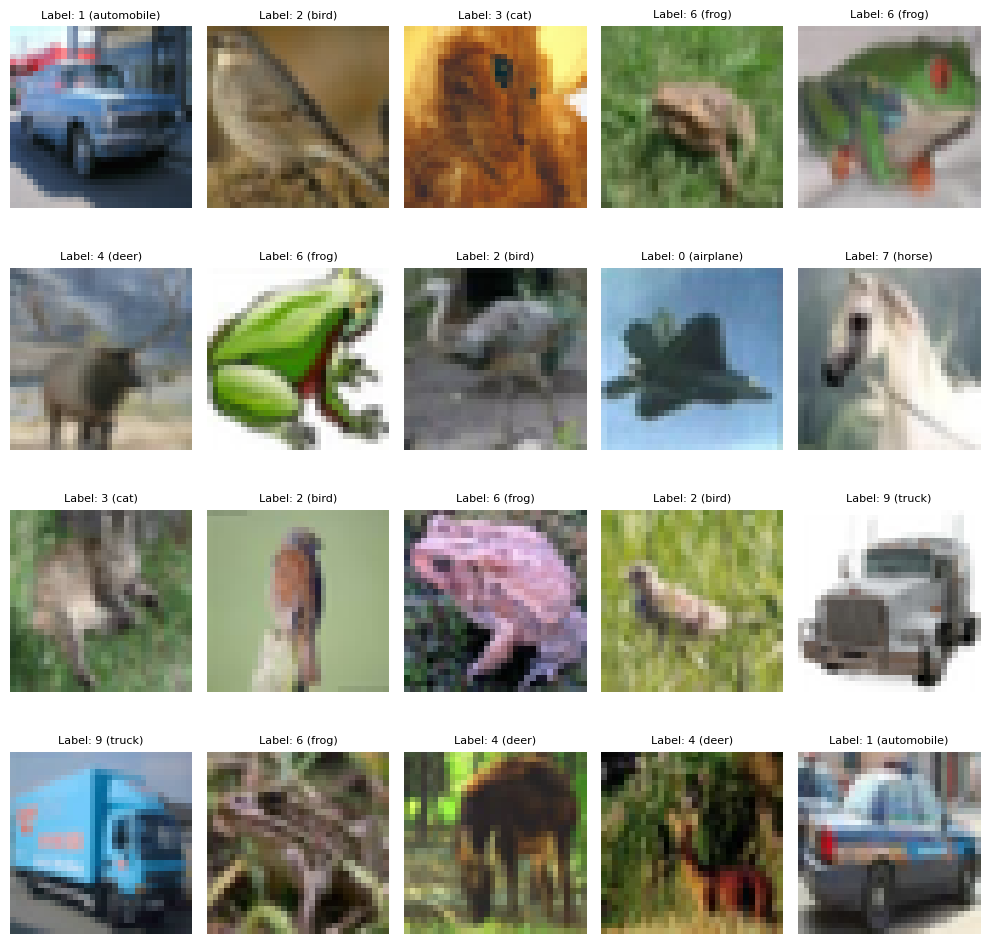

In [11]:
import matplotlib.pyplot as plt
import numpy as np


cifar10_class_names = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

fig, axes = plt.subplots(4, 5, figsize=(10, 10))
axes = axes.flatten()

for i in range(20):

    idx = np.random.randint(0, x_train.shape[0])


    axes[i].imshow(x_train[idx])

    class_label_idx = np.argmax(y_train[idx])
    axes[i].set_title(f"Label: {class_label_idx} ({cifar10_class_names[class_label_idx]})", fontsize=8)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [26]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(64, activation='relu'))
model1.add(tf.keras.layers.Dense(10, activation='softmax'))

In [29]:
model1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model1.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

In [34]:
history = model1.fit(
    x_train, y_train,
    epochs=13,
    batch_size=64,
    validation_data=(x_test, y_test)
)

Epoch 1/13
782/782 ━━━━━━━━━━━━━━━━━━━━ 60s 74ms/step - accuracy: 0.3381 - loss: 1.7800 - val_accuracy: 0.5346 - val_loss: 1.2966
Epoch 2/13
782/782 ━━━━━━━━━━━━━━━━━━━━ 58s 75ms/step - accuracy: 0.5462 - loss: 1.2729 - val_accuracy: 0.5554 - val_loss: 1.2374
Epoch 3/13
782/782 ━━━━━━━━━━━━━━━━━━━━ 60s 77ms/step - accuracy: 0.6081 - loss: 1.1055 - val_accuracy: 0.6366 - val_loss: 1.0269
Epoch 4/13
782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 76ms/step - accuracy: 0.6530 - loss: 0.9902 - val_accuracy: 0.6524 - val_loss: 0.9959
Epoch 5/13
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 73ms/step - accuracy: 0.6854 - loss: 0.9131 - val_accuracy: 0.6753 - val_loss: 0.9296
Epoch 6/13
782/782 ━━━━━━━━━━━━━━━━━━━━ 85s 76ms/step - accuracy: 0.7052 - loss: 0.8393 - val_accuracy: 0.6827 - val_loss: 0.9137
Epoch 7/13
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 75ms/step - accuracy: 0.7236 - loss: 0.7856 - val_accuracy: 0.6999 - val_loss: 0.8801
Epoch 8/13
782/782 ━━━━━━━━━━━━━━━━━━━━ 60s 77ms/step - accuracy: 0.7447 - loss: 0.7319 - 

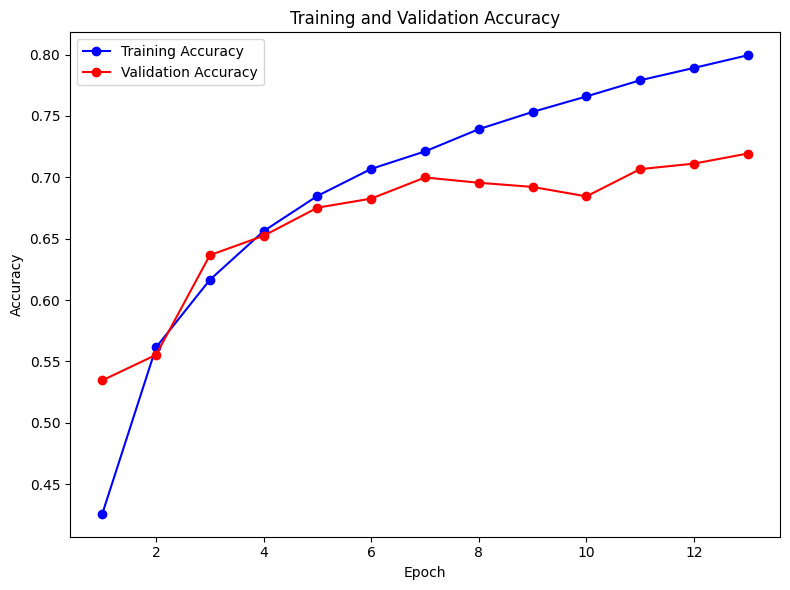

In [35]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(8, 6))
plt.plot(epochs, accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [39]:
y_pred = model1.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


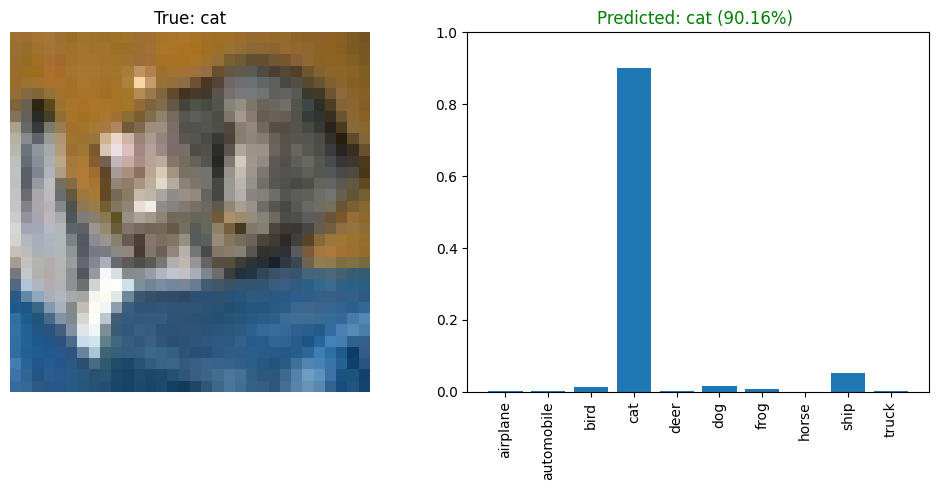

In [40]:
import numpy as np
import matplotlib.pyplot as plt

cifar10_class_names = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

true_class_to_find = 3

matching_indices = np.where(np.argmax(y_test, axis=1) == true_class_to_find)[0]

if len(matching_indices) > 0:
    idx = matching_indices[0]

image = x_test[idx]
true_label_idx = np.argmax(y_test[idx])
predicted_probabilities = y_pred[idx]
predicted_label_idx = np.argmax(predicted_probabilities)
confidence = predicted_probabilities[predicted_label_idx] * 100

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.axis('off')
plt.title(f"True: {cifar10_class_names[true_label_idx]}")

plt.subplot(1, 2, 2)
plt.bar(cifar10_class_names, predicted_probabilities)
plt.xticks(rotation=90)
plt.ylim(0, 1)
color = 'green' if predicted_label_idx == true_label_idx else 'red'
plt.title(f"Predicted: {cifar10_class_names[predicted_label_idx]} ({confidence:.2f}%) ", color=color)

plt.tight_layout()
plt.show()